***Clasificación de Clientes Premium en un Supermercado***

Paulo Tibanta y Cristian Ruano

Enlace Github: https://github.com/pauloodd723/SalesSupermarketVIP

 **FASE: Preparación del Entorno (CRISP-DM: Comprensión y Preparación de los Datos)**

In [2]:
#--- BLOQUE 1 ---
# - Manipular datos (pandas)
# - Crear gráficos exploratorios (seaborn, matplotlib)
# - Entrenar modelos (scikit-learn)
# - Guardar y cargar modelos (joblib)
# - Crear la API final (flask)
!pip install scikit-learn pandas seaborn matplotlib flask joblib


**FASE CRISP-DM: Comprensión de los Datos**

In [3]:
# --- BLOQUE 2 ---
# En esta fase cargamos todas las librerías utilizadas para:
# - Manipulación de datos (pandas, numpy)
# - Visualización y análisis exploratorio (matplotlib, seaborn)
# Estas herramientas permiten examinar la estructura, distribución
# y calidad de los datos antes de limpiarlos o modelarlos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
# --- BLOQUE 3 ---
from google.colab import files

uploaded = files.upload()  # Subes el ZIP aquí


Saving archive (1).zip to archive (1).zip


In [5]:
# --- BLOQUE 4 ---
import zipfile
import io

# Busca automáticamente el ZIP subido
for fname in uploaded.keys():
    zip_filename = fname

# Extraer contenido
with zipfile.ZipFile(zip_filename, "r") as z:
    z.extractall("data")

print("Archivos extraídos correctamente.")


Archivos extraídos correctamente.


In [7]:
# --- BLOQUE 5 ---

# Carga de los datasets crudos desde la carpeta extraída
df1 = pd.read_csv("data/annex1.csv")
df2 = pd.read_csv("data/annex2.csv")
df3 = pd.read_csv("data/annex3.csv")
df4 = pd.read_csv("data/annex4.csv")

# Vista preliminar de las primeras filas para verificar contenido

df1.head(), df2.head(), df3.head(), df4.head()


(         Item Code              Item Name  Category Code  \
 0  102900005115168       Niushou Shengcai     1011010101   
 1  102900005115199      Sichuan Red Cedar     1011010101   
 2  102900005115625  Local Xiaomao Cabbage     1011010101   
 3  102900005115748           White Caitai     1011010101   
 4  102900005115762               Amaranth     1011010101   
 
             Category Name  
 0  Flower/Leaf Vegetables  
 1  Flower/Leaf Vegetables  
 2  Flower/Leaf Vegetables  
 3  Flower/Leaf Vegetables  
 4  Flower/Leaf Vegetables  ,
          Date          Time        Item Code  Quantity Sold (kilo)  \
 0  2020-07-01  09:15:07.924  102900005117056                 0.396   
 1  2020-07-01  09:17:27.295  102900005115960                 0.849   
 2  2020-07-01  09:17:33.905  102900005117056                 0.409   
 3  2020-07-01  09:19:45.450  102900005115823                 0.421   
 4  2020-07-01  09:20:23.686  102900005115908                 0.539   
 
    Unit Selling Price (RMB/k

In [9]:
# --- BLOQUE 6 ---
#   - Número total de registros
#   - Número de columnas
#   - Tipos de datos (object, int, float…)
#   - Presencia de valores nulos
print("Annex 1:")
print(df1.info())
print("\nAnnex 2:")
print(df2.info())
print("\nAnnex 3:")
print(df3.info())
print("\nAnnex 4:")
print(df4.info())


Annex 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB
None

Annex 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 

**Limpieza**

In [10]:
# --- BLOQUE 7 ---

# 1. Convertir fechas a datetime
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')

# 2. Parseo seguro de la columna Time (con y sin milisegundos)
def parse_time(t):
    try:
        # formato con milisegundos
        return pd.to_datetime(t, format='%H:%M:%S.%f').time()
    except:
        try:
            # formato sin milisegundos
            return pd.to_datetime(t, format='%H:%M:%S').time()
        except:
            # último intento flexible (muy raro)
            return pd.to_datetime(t, errors='coerce').time()

df2['Time'] = df2['Time'].apply(parse_time)

# 3. Crear columna DateTime combinada (sin formato fijo)
df2['DateTime'] = pd.to_datetime(
    df2['Date'].astype(str) + ' ' + df2['Time'].astype(str),
    errors='coerce'
)

# 4. Eliminar duplicados
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)
df4.drop_duplicates(inplace=True)

# 5. Mostrar nulos
print("Nulos Annex 1:\n", df1.isnull().sum())
print("\nNulos Annex 2:\n", df2.isnull().sum())
print("\nNulos Annex 3:\n", df3.isnull().sum())
print("\nNulos Annex 4:\n", df4.isnull().sum())

print("\n--- Limpieza completada correctamente ---")


Nulos Annex 1:
 Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

Nulos Annex 2:
 Date                             0
Time                             0
Item Code                        0
Quantity Sold (kilo)             0
Unit Selling Price (RMB/kg)      0
Sale or Return                   0
Discount (Yes/No)                0
DateTime                       716
dtype: int64

Nulos Annex 3:
 Date                        0
Item Code                   0
Wholesale Price (RMB/kg)    0
dtype: int64

Nulos Annex 4:
 Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64

--- Limpieza completada correctamente ---


In [11]:
# --- BLOQUE 8 ---
#UNIFICACIÓN DE DATASETS

# 1. Unir Annex 1 + Annex 4 → metadata del producto
df_items = df1.merge(df4, on='Item Code', how='left')

# 2. Unir Annex 2 + df_items → ventas con info de producto
df_sales = df2.merge(df_items, on='Item Code', how='left')

# 3. Unir df_sales + Annex 3 → agregar precio mayorista
df_full = df_sales.merge(df3, on=['Item Code', 'Date'], how='left')

# 4. Verificar la forma final
print("Shape final:", df_full.shape)
print("\nColumnas finales:")
print(df_full.columns)

# 5. Revisión rápida de nulos finales
print("\nNulos totales por columna:")
print(df_full.isnull().sum())


Shape final: (878503, 14)

Columnas finales:
Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)',
       'DateTime', 'Item Name_x', 'Category Code', 'Category Name',
       'Item Name_y', 'Loss Rate (%)', 'Wholesale Price (RMB/kg)'],
      dtype='object')

Nulos totales por columna:
Date                             0
Time                             0
Item Code                        0
Quantity Sold (kilo)             0
Unit Selling Price (RMB/kg)      0
Sale or Return                   0
Discount (Yes/No)                0
DateTime                       716
Item Name_x                      0
Category Code                    0
Category Name                    0
Item Name_y                      0
Loss Rate (%)                    0
Wholesale Price (RMB/kg)         0
dtype: int64


**FASE CRISP-DM: Preparación de los Datos**

In [12]:
# --- BLOQUE 9 ---
# Ajustes finales antes de EDA
# Eliminar columna duplicada y renombrar
df_full = df_full.drop(columns=['Item Name_y'])
df_full.rename(columns={'Item Name_x': 'Item Name'}, inplace=True)

# Eliminar filas con DateTime nulo
df_full = df_full.dropna(subset=['DateTime'])

# Verificar cambios
print(df_full.shape)
print(df_full.columns)
print(df_full.isnull().sum())


(877787, 13)
Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)',
       'DateTime', 'Item Name', 'Category Code', 'Category Name',
       'Loss Rate (%)', 'Wholesale Price (RMB/kg)'],
      dtype='object')
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
DateTime                       0
Item Name                      0
Category Code                  0
Category Name                  0
Loss Rate (%)                  0
Wholesale Price (RMB/kg)       0
dtype: int64


In [23]:
# --- BLOQUE 10 ---
# 1. Información general del dataset
print(df_full.info())
print(df_full.describe())

# 2. Filtrado de valores atípicos o irreales
df_full = df_full[df_full["Quantity Sold (kilo)"] >= 0]
df_full = df_full[df_full["Quantity Sold (kilo)"] <= 20]

<class 'pandas.core.frame.DataFrame'>
Index: 877323 entries, 0 to 878502
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         877323 non-null  datetime64[ns]
 1   Time                         877323 non-null  object        
 2   Item Code                    877323 non-null  int64         
 3   Quantity Sold (kilo)         877323 non-null  float64       
 4   Unit Selling Price (RMB/kg)  877323 non-null  float64       
 5   Sale or Return               877323 non-null  object        
 6   Discount (Yes/No)            877323 non-null  object        
 7   DateTime                     877323 non-null  datetime64[ns]
 8   Item Name                    877323 non-null  object        
 9   Category Code                877323 non-null  int64         
 10  Category Name                877323 non-null  object        
 11  Loss Rate (%)                87

In [25]:
# --- BLOQUE 11 ---
#Limpieza y saneamiento antes de calcular Revenue/Margin
# Normalizar nombres de columnas (por si acaso) y limpiar espacios raros
df_full.columns = [c.strip().replace('\xa0', ' ') for c in df_full.columns]

# 1) Reparar o eliminar cantidades negativas
# Si una fila es 'return', permitimos cantidad negativa (la convertimos a positiva).
mask_return = df_full['Sale or Return'].str.lower().str.contains('return|devol', na=False)
# Convertir valores negativos a positivos si son devoluciones
df_full.loc[mask_return, 'Quantity Sold (kilo)'] = df_full.loc[mask_return, 'Quantity Sold (kilo)'].abs()

# Para las no-devoluciones, eliminamos filas con cantidad negativa (datos corruptos)
df_full = df_full[df_full['Quantity Sold (kilo)'] >= 0].copy()

# 2) Eliminar cantidades totalmente imposibles o outliers extremos
# Usamos percentiles para recortar (capping) en 99.5 percentil
q_low, q_high = df_full['Quantity Sold (kilo)'].quantile(0.001), df_full['Quantity Sold (kilo)'].quantile(0.995)
df_full['Quantity Sold (kilo)'] = df_full['Quantity Sold (kilo)'].clip(lower=q_low, upper=q_high)

# 3) Corregir / normalizar columnas categóricas (sin NBSP, espacios trim)
df_full['Sale or Return'] = df_full['Sale or Return'].str.strip().str.lower()
df_full['Discount (Yes/No)'] = df_full['Discount (Yes/No)'].str.strip().replace({'Yes':'Yes','No':'No','yes':'Yes','no':'No','Sí':'Yes','Si':'Yes','si':'Yes'})
# Aseguramos valores consistentes
df_full['Discount (Yes/No)'] = df_full['Discount (Yes/No)'].replace({'Yes':'Yes','No':'No'})

# 4) Asegurarnos de que Loss Rate tenga sentido (0-100)
df_full['Loss Rate (%)'] = df_full['Loss Rate (%)'].clip(lower=0, upper=100)

# 5) Convertir Category Name limpiando NBSP
df_full['Category Name'] = df_full['Category Name'].str.replace('\xa0', ' ').str.strip()

# 6) Chequeos rápidos
print("Shape tras limpieza inicial:", df_full.shape)
print("Quantity Sold (kilo) stats:", df_full['Quantity Sold (kilo)'].describe())
print("Loss Rate (%) stats:", df_full['Loss Rate (%)'].describe())
print("Valores únicos Sale or Return (muestra):", df_full['Sale or Return'].value_counts().head())
print("Valores únicos Discount (muestra):", df_full['Discount (Yes/No)'].value_counts())


Shape tras limpieza inicial: (877323, 19)
Quantity Sold (kilo) stats: count    877323.000000
mean          0.532614
std           0.323724
min           0.029000
25%           0.290000
50%           0.435000
75%           0.742000
max           1.806000
Name: Quantity Sold (kilo), dtype: float64
Loss Rate (%) stats: count    877323.000000
mean         10.122898
std           4.741772
min           0.000000
25%           6.270000
50%           9.430000
75%          13.620000
max          29.250000
Name: Loss Rate (%), dtype: float64
Valores únicos Sale or Return (muestra): Sale or Return
sale    877323
Name: count, dtype: int64
Valores únicos Discount (muestra): Discount (Yes/No)
No     829995
Yes     47328
Name: count, dtype: int64


In [26]:

# --- BLOQUE 12 ---
#Revenue, Margin, target VIP y diagnósticos
df_full['Revenue'] = df_full['Quantity Sold (kilo)'] * df_full['Unit Selling Price (RMB/kg)']
df_full['Margin'] = df_full['Revenue'] - (df_full['Quantity Sold (kilo)'] * df_full['Wholesale Price (RMB/kg)'])

# Definir target VIP por cuartil 75 sobre Revenue (como hacías)
Q3_revenue = df_full['Revenue'].quantile(0.75)
df_full['VIP'] = (df_full['Revenue'] >= Q3_revenue).astype(int)

print(f"Umbral Q3 (P75) para Revenue: {Q3_revenue:.4f} RMB")
print("Distribución VIP (counts):\n", df_full['VIP'].value_counts())
print("Distribución VIP (proportions):\n", df_full['VIP'].value_counts(normalize=True))

# Estadísticas tras limpieza
print("\nDescribe (quantiles seleccionados):")
print(df_full[['Quantity Sold (kilo)','Revenue','Margin','Loss Rate (%)']].describe(percentiles=[0.001,0.01,0.05,0.25,0.5,0.75,0.95,0.99,0.999]).T)

# Correlación rápida para ver qué relaciona con Revenue/VIP
print("\nCorrelaciones (pearson) con Revenue:")
print(df_full[['Quantity Sold (kilo)','Loss Rate (%)','Unit Selling Price (RMB/kg)','Wholesale Price (RMB/kg)','Revenue']].corr()['Revenue'].sort_values(ascending=False))


Umbral Q3 (P75) para Revenue: 4.7340 RMB
Distribución VIP (counts):
 VIP
0    657874
1    219449
Name: count, dtype: int64
Distribución VIP (proportions):
 VIP
0    0.749865
1    0.250135
Name: proportion, dtype: float64

Describe (quantiles seleccionados):
                         count       mean       std       min      0.1%  \
Quantity Sold (kilo)  877323.0   0.532614  0.323724    0.0290  0.029000   
Revenue               877323.0   3.825585  2.423813    0.0201  0.348000   
Margin                877323.0   1.412591  1.089275 -126.0000 -1.473687   
Loss Rate (%)         877323.0  10.122898  4.741772    0.0000  0.000000   

                         1%       5%      25%     50%      75%        95%  \
Quantity Sold (kilo)  0.072  0.14500  0.29000  0.4350   0.7420   1.000000   
Revenue               0.702  1.11180  2.21000  3.3280   4.7340   8.320000   
Margin               -0.160  0.28944  0.73406  1.1956   1.8564   3.278427   
Loss Rate (%)         0.450  3.43000  6.27000  9.4300  13.

In [27]:
# --- BLOQUE 13 ---
# Encoding, features y escalado robusto
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# LabelEncoders (guardamos para API)
le_category = LabelEncoder()
df_full['Category_Code_Num'] = le_category.fit_transform(df_full['Category Name'])
joblib.dump(le_category, "le_category.pkl")

le_discount = LabelEncoder()
df_full['Discount_Flag'] = le_discount.fit_transform(df_full['Discount (Yes/No)'])
joblib.dump(le_discount, "le_discount.pkl")

le_sale = LabelEncoder()
df_full['Sale_Flag'] = le_sale.fit_transform(df_full['Sale or Return'])
joblib.dump(le_sale, "le_sale.pkl")

print("Clases le_category:", le_category.classes_)
print("Clases le_discount:", le_discount.classes_)
print("Clases le_sale:", le_sale.classes_)

# Selección de features (sin fuga)
features = ['Quantity Sold (kilo)', 'Loss Rate (%)', 'Category_Code_Num', 'Discount_Flag', 'Sale_Flag']
X = df_full[features].copy()
y = df_full['VIP'].values

# Opcional: ingeniería ligera (log transform para cantidad si hay asimetría)
# Evita distorsiones por outliers: aplicar log1p
X['Quantity Sold (kilo)'] = np.log1p(X['Quantity Sold (kilo)'])

# Escalado robusto (StandardScaler está bien, pero robust scaler también es opción)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

# Division train/test estratificada
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Shapes finales: ", X_train.shape, X_test.shape)
print("Proporción VIP en train:", y_train.mean(), "en test:", y_test.mean())


Clases le_category: ['Aquatic Tuberous Vegetables' 'Cabbage' 'Capsicum' 'Edible Mushroom'
 'Flower/Leaf Vegetables' 'Solanum']
Clases le_discount: ['No' 'Yes']
Clases le_sale: ['sale']
Shapes finales:  (701858, 5) (175465, 5)
Proporción VIP en train: 0.25013464262001717 en test: 0.25013535462912834


In [28]:
# --- BLOQUE 14 ---
# TRANSFORMACIONES PARA EL EDA
# En este bloque se crean agregados básicos para análisis exploratorio:
# - Se calcula el top 10 de productos más vendidos (por kilos vendidos)
# - Se calculan las ventas totales por categoría de producto
# Esto ayuda a entender la distribución de ventas y patrones preliminares
# antes de graficar o modelar.

# Top 10 productos más vendidos
top_products = (
    df_full.groupby("Item Name")["Quantity Sold (kilo)"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Ventas por categoría
category_sales = (
    df_full.groupby("Category Name")["Quantity Sold (kilo)"]
    .sum()
    .sort_values(ascending=False)
)

# Revisar resultados
print("Top products:")
print(top_products)

print("\nCategory sales:")
print(category_sales)


Top products:
Item Name
Wuhu Green Pepper (1)    28148.146
Broccoli                 27506.098
Net Lotus Root (1)       26769.163
Chinese Cabbage          19758.665
Yunnan Shengcai          15885.340
Needle Mushroom (Box)    15582.060
Yunnan Lettuce (Bag)     14311.642
Eggplant (2)             13579.311
Xixia Mushroom (1)       11868.275
Millet Pepper (Bag)      10831.612
Name: Quantity Sold (kilo), dtype: float64

Category sales:
Category Name
Flower/Leaf Vegetables         196808.276
Capsicum                        91528.604
Edible Mushroom                 75949.613
Cabbage                         41715.666
Aquatic Tuberous Vegetables     38884.058
Solanum                         22388.414
Name: Quantity Sold (kilo), dtype: float64


/tmp/ipython-input-2092826721.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis", dodge=False)


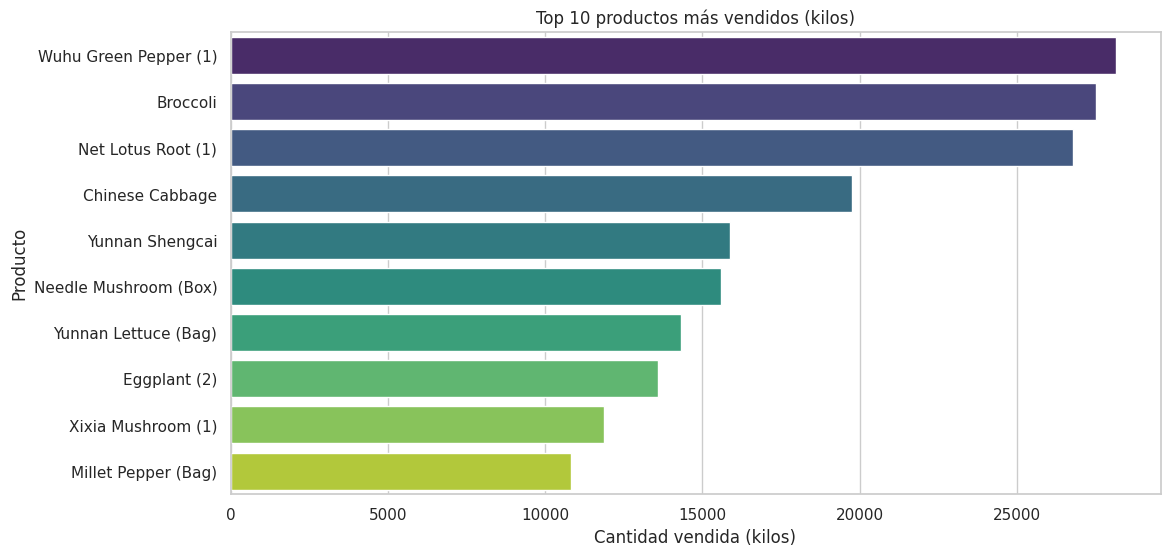

/tmp/ipython-input-2092826721.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="magma", dodge=False)


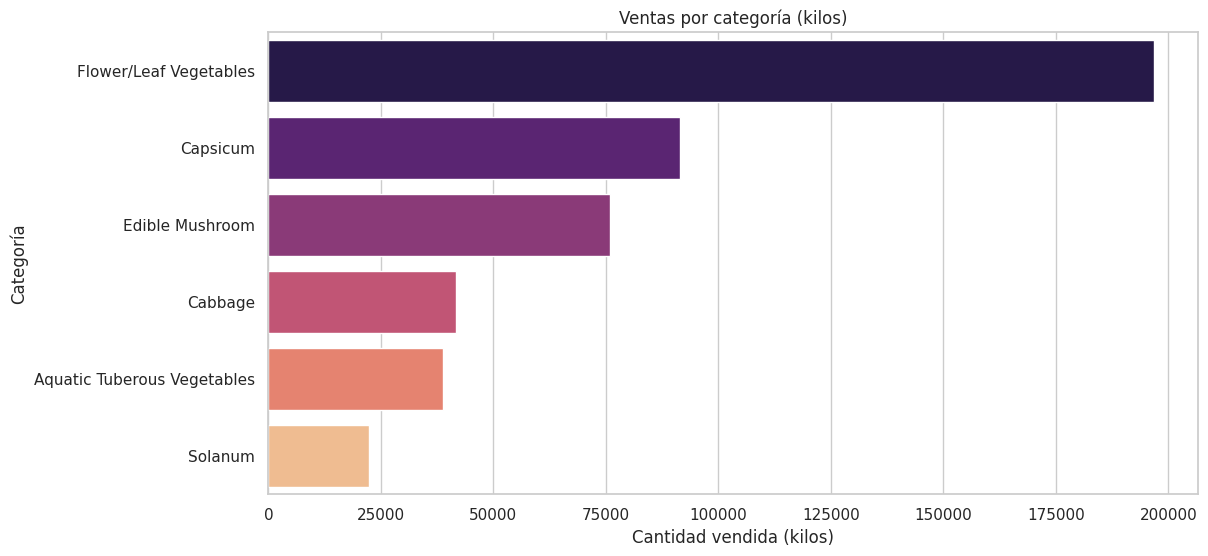

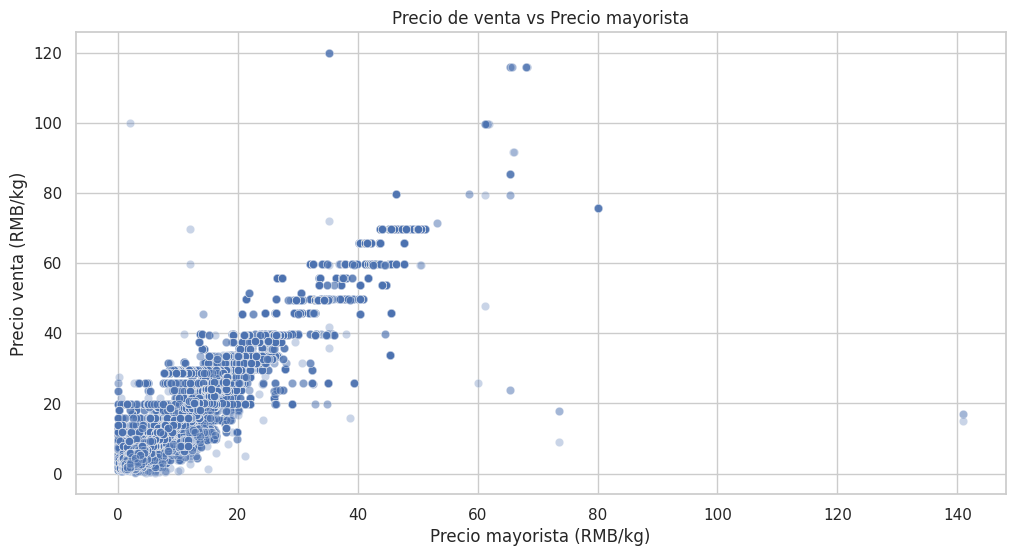

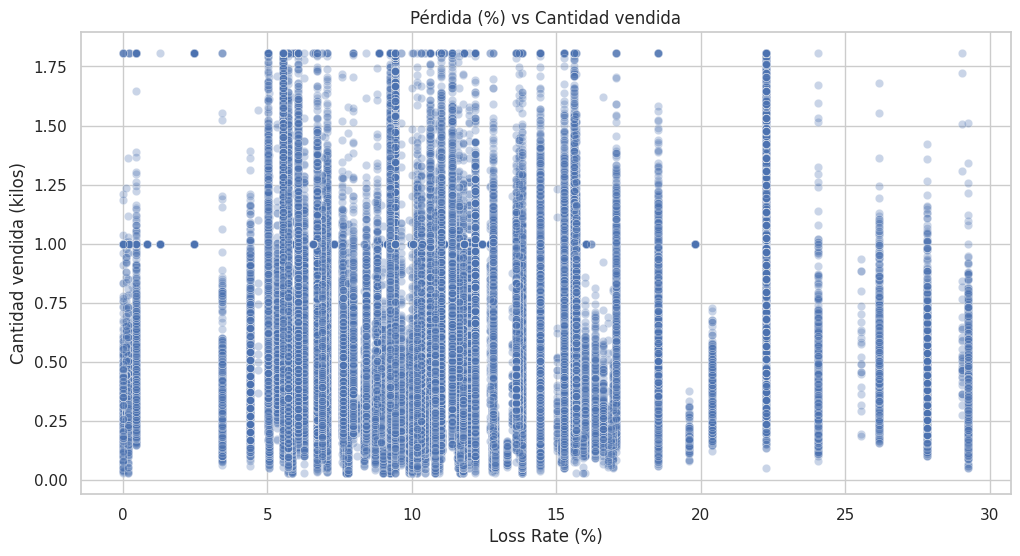

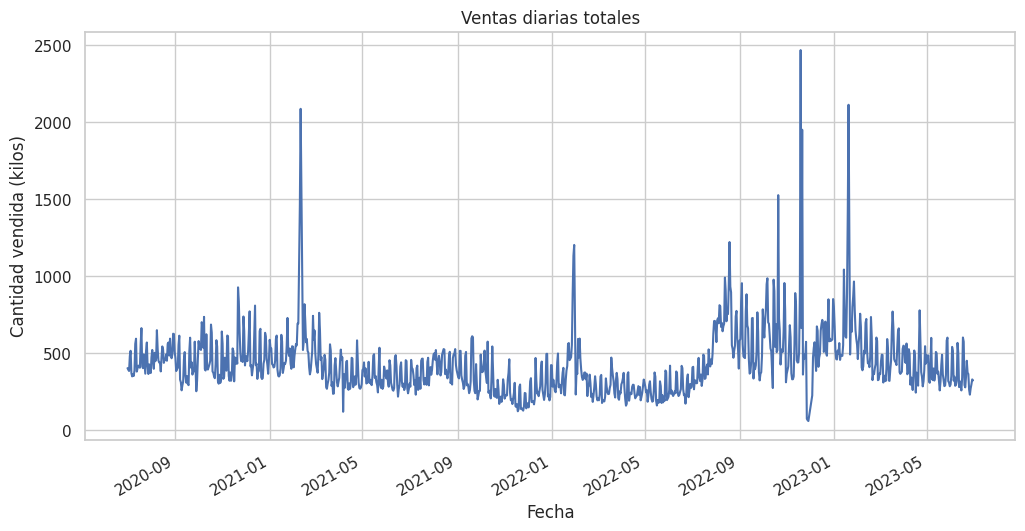

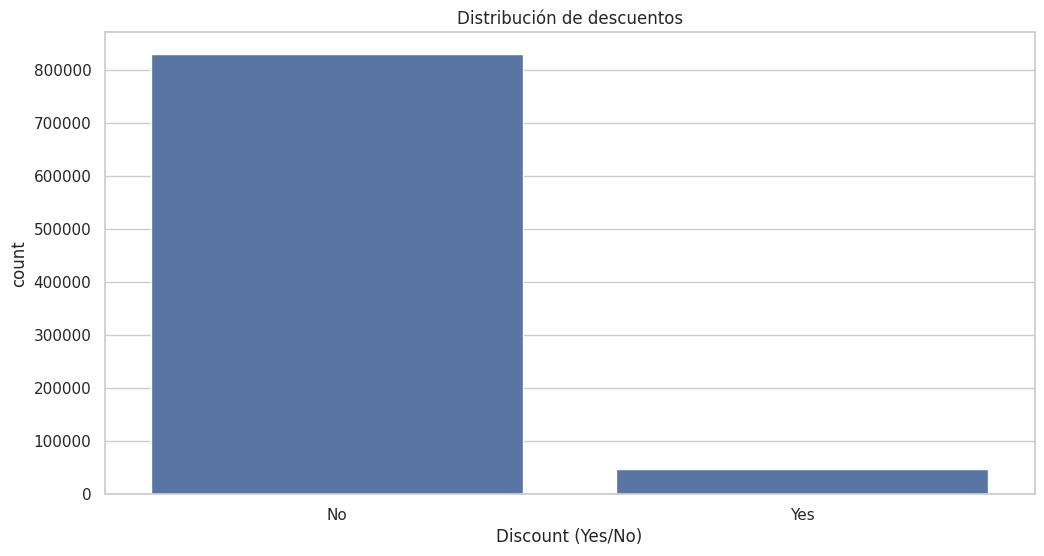

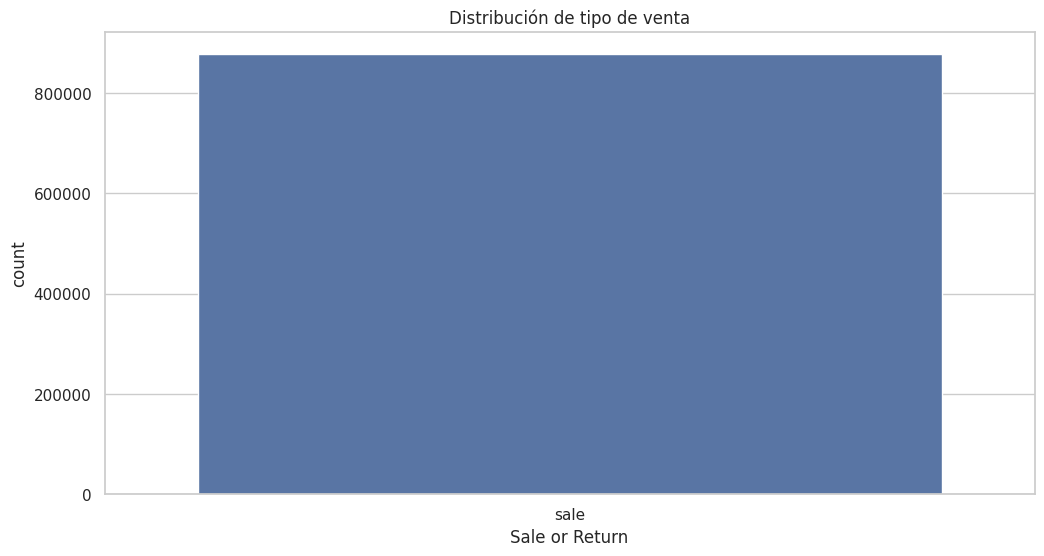

In [29]:
# --- BLOQUE 15 ---
#ANÁLISIS EXPLORATORIO DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Top 10 productos más vendidos
plt.figure()
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis", dodge=False)
plt.title("Top 10 productos más vendidos (kilos)")
plt.xlabel("Cantidad vendida (kilos)")
plt.ylabel("Producto")
plt.show()

# Ventas por categoría
plt.figure()
sns.barplot(x=category_sales.values, y=category_sales.index, palette="magma", dodge=False)
plt.title("Ventas por categoría (kilos)")
plt.xlabel("Cantidad vendida (kilos)")
plt.ylabel("Categoría")
plt.show()


# 3. Relación Precio de venta vs Precio mayorista
plt.figure()
sns.scatterplot(x='Wholesale Price (RMB/kg)', y='Unit Selling Price (RMB/kg)', data=df_full, alpha=0.3)
plt.title("Precio de venta vs Precio mayorista")
plt.xlabel("Precio mayorista (RMB/kg)")
plt.ylabel("Precio venta (RMB/kg)")
plt.show()

# 4. Pérdida (%) vs cantidad vendida
plt.figure()
sns.scatterplot(x='Loss Rate (%)', y='Quantity Sold (kilo)', data=df_full, alpha=0.3)
plt.title("Pérdida (%) vs Cantidad vendida")
plt.xlabel("Loss Rate (%)")
plt.ylabel("Cantidad vendida (kilos)")
plt.show()

# 5. Series de tiempo: ventas diarias totales
daily_sales = df_full.groupby('Date')['Quantity Sold (kilo)'].sum()
plt.figure()
daily_sales.plot()
plt.title("Ventas diarias totales")
plt.xlabel("Fecha")
plt.ylabel("Cantidad vendida (kilos)")
plt.show()

# 6. Distribución de descuentos
plt.figure()
sns.countplot(x='Discount (Yes/No)', data=df_full)
plt.title("Distribución de descuentos")
plt.show()

# 7. Distribución de tipo de venta (Sale / Return)
plt.figure()
sns.countplot(x='Sale or Return', data=df_full)
plt.title("Distribución de tipo de venta")
plt.show()

**MODELADO**

In [30]:
# --- BLOQUE 16 ---
# (RandomForest/XGBoost + SVM + K-MEANS)
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
import numpy as np

# -----------------------
# 1. Subsample para entrenamiento rápido (13k registros)
# -----------------------
sample_size = 13000
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=sample_size, random_state=42, stratify=y_train
)
X_test_sample = X_test
y_test_sample = y_test

print(f"Shapes subsample: X_train_sample: {X_train_sample.shape}, X_test_sample: {X_test_sample.shape}")

# -----------------------
# 2. MODELADO VIP - RandomForest + XGBoost
# -----------------------
# RandomForest
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=8, class_weight='balanced', random_state=42
)
rf_model.fit(X_train_sample, y_train_sample)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.1,
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb_model.fit(X_train_sample, y_train_sample)

# Evaluación en test
def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(f"\n=== Evaluación {nombre} ===")
    print(f"Accuracy: {acc:.4f} | F1: {f1:.4f} | AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))
    return auc

auc_rf = evaluar_modelo(rf_model, X_test_sample, y_test_sample, "RandomForest")
auc_xgb = evaluar_modelo(xgb_model, X_test_sample, y_test_sample, "XGBoost")

# Elegir mejor modelo según AUC
if auc_rf >= auc_xgb:
    best_vip_model = rf_model
    print("\n✅ Modelo final VIP seleccionado: RandomForest")
else:
    best_vip_model = xgb_model
    print("\n✅ Modelo final VIP seleccionado: XGBoost")

joblib.dump(best_vip_model, "clf_vip_model.pkl")

# -----------------------
# 3. SVM secundario (obligatorio)
# -----------------------
svm_model = SVC(C=1, kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_sample, y_train_sample)
joblib.dump(svm_model, "svm_vip_model.pkl")
print("✅ Modelo SVM entrenado y guardado (secundario)")

# -----------------------
# 4. K-Means Segmentación
# -----------------------
best_k = 5
kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)
joblib.dump(kmeans_model, "kmeans_model.pkl")
print("✅ K-Means entrenado y guardado")

# Evaluación rápida K-Means
X_sample = X_scaled[::100]
labels_sample = kmeans_model.predict(X_sample)
s_score = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score K-Means (muestra): {s_score:.4f}")

# -----------------------
# 5. Guardar Scaler y LabelEncoders
# -----------------------
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_category, "le_category.pkl")
joblib.dump(le_discount, "le_discount.pkl")
joblib.dump(le_sale, "le_sale.pkl")
print("✅ Todos los preprocessors guardados")

# -----------------------
# 6. Listo para API
# -----------------------
print("\n✅ Modelos y preprocessors listos para integración en API")


Shapes subsample: X_train_sample: (13000, 5), X_test_sample: (175465, 5)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:48:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluación RandomForest ===
Accuracy: 0.7522 | F1: 0.6250 | AUC-ROC: 0.8719
              precision    recall  f1-score   support

           0       0.93      0.73      0.81    131575
           1       0.50      0.83      0.62     43890

    accuracy                           0.75    175465
   macro avg       0.71      0.78      0.72    175465
weighted avg       0.82      0.75      0.77    175465


=== Evaluación XGBoost ===
Accuracy: 0.8513 | F1: 0.6560 | AUC-ROC: 0.8986
              precision    recall  f1-score   support

           0       0.87      0.95      0.91    131575
           1       0.78      0.57      0.66     43890

    accuracy                           0.85    175465
   macro avg       0.82      0.76      0.78    175465
weighted avg       0.85      0.85      0.84    175465


✅ Modelo final VIP seleccionado: XGBoost
✅ Modelo SVM entrenado y guardado (secundario)
✅ K-Means entrenado y guardado
Silhouette Score K-Means (muestra): 0.3594
✅ Todos los preprocessors 

In [ ]:
#Descargar Modelos
from google.colab import files

for f in ["clf_vip_model.pkl", "svm_vip_model.pkl", "kmeans_model.pkl",
          "scaler.pkl", "le_category.pkl", "le_discount.pkl", "le_sale.pkl"]:
    files.download(f)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
#Descargar CSV LIMPIO
from google.colab import files

# Guardar el dataset final limpio
df_full.to_csv("MineriaProyectoFinal_clean.csv", index=False)

# Descargar el CSV
files.download("MineriaProyectoFinal_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>